R^2, RMSE & MAE

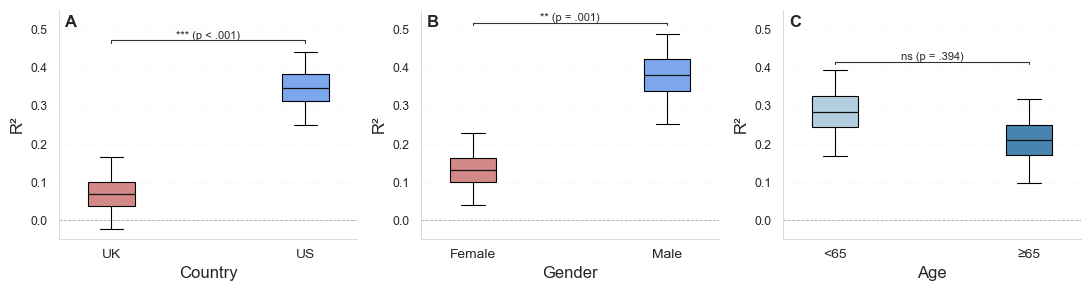

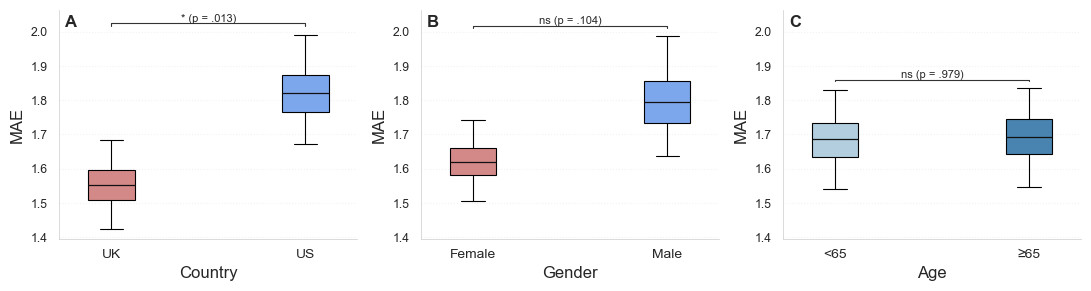

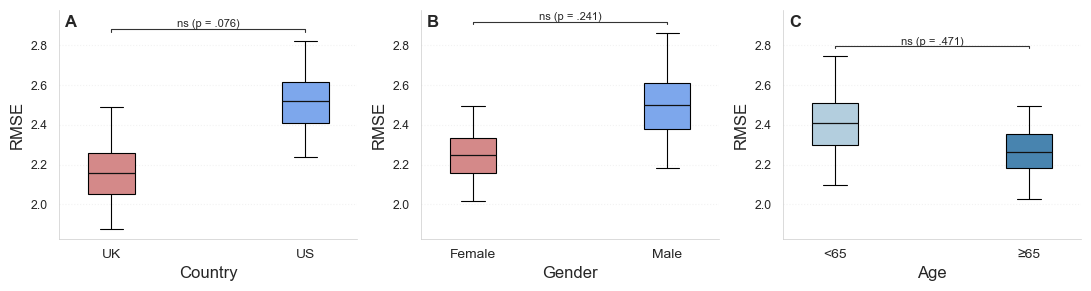

PictureNamingScore {'metrics_by_subgroup_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PictureNamingScore/bias_metrics_by_subgroup_PictureNamingScore.csv', 'pairwise_tests_R2_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PictureNamingScore/bias_pairwise_tests_R2_PictureNamingScore.csv', 'pairwise_tests_MAE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PictureNamingScore/bias_pairwise_tests_MAE_PictureNamingScore.csv', 'pairwise_tests_RMSE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PictureNamingScore/bias_pairwise_tests_RMSE_PictureNamingScore.csv', 'panels_R2_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PictureNamingScore/bias_panels_R2_PictureNamingScore.png', 'panels_MAE_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/resu

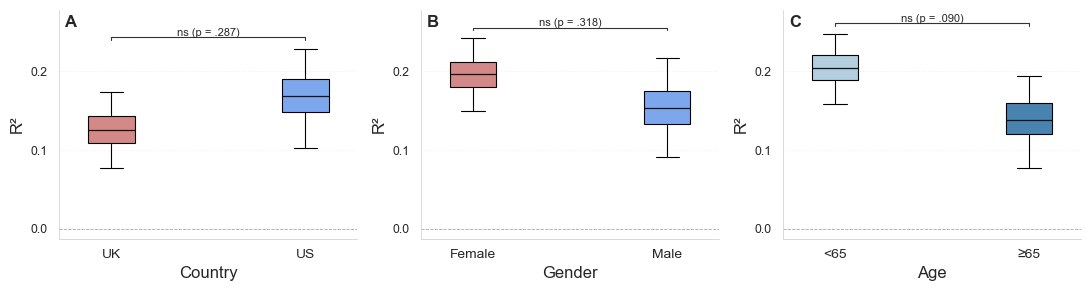

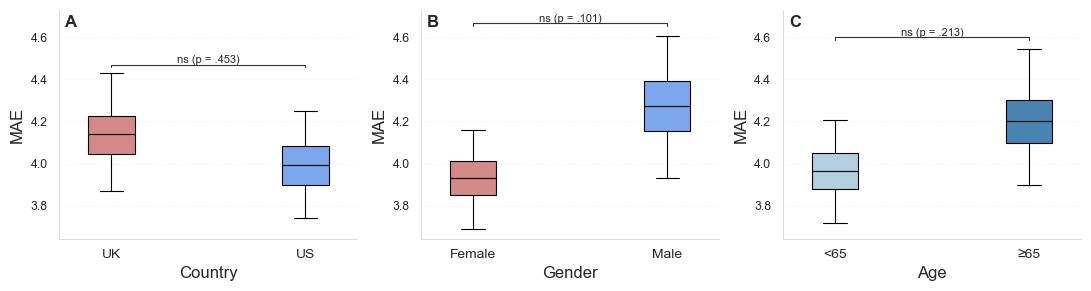

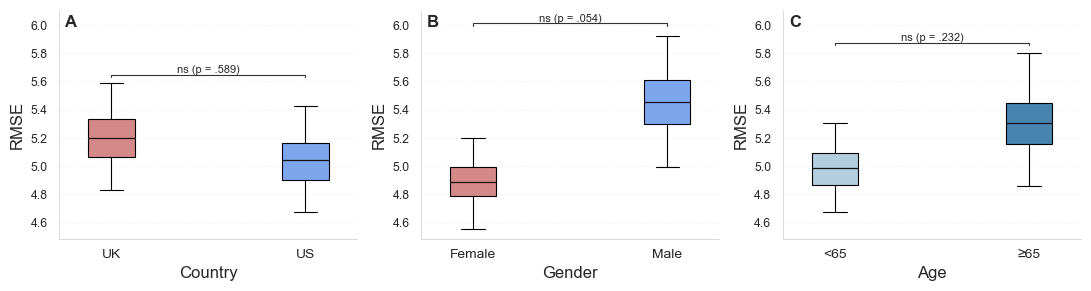

SemanticFluencyScore {'metrics_by_subgroup_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/SemanticFluencyScore/bias_metrics_by_subgroup_SemanticFluencyScore.csv', 'pairwise_tests_R2_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/SemanticFluencyScore/bias_pairwise_tests_R2_SemanticFluencyScore.csv', 'pairwise_tests_MAE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/SemanticFluencyScore/bias_pairwise_tests_MAE_SemanticFluencyScore.csv', 'pairwise_tests_RMSE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/SemanticFluencyScore/bias_pairwise_tests_RMSE_SemanticFluencyScore.csv', 'panels_R2_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/SemanticFluencyScore/bias_panels_R2_SemanticFluencyScore.png', 'panels_MAE_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/

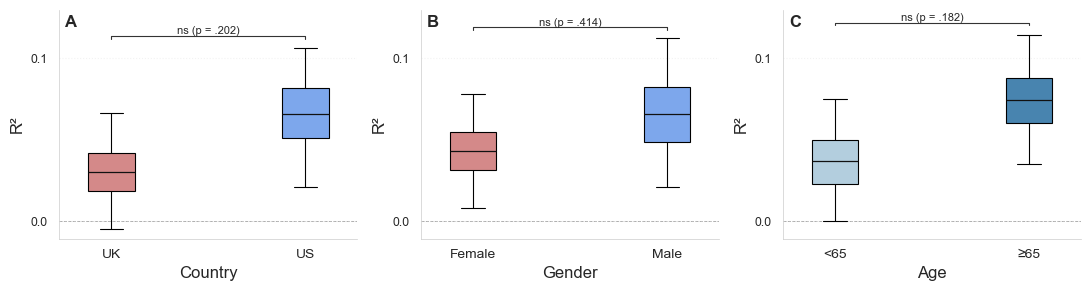

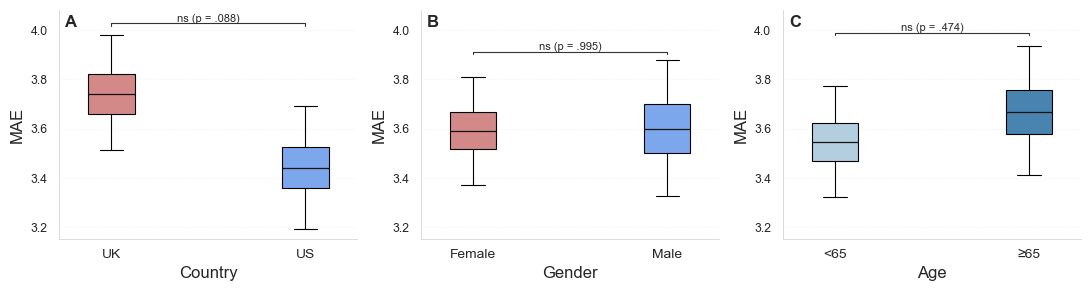

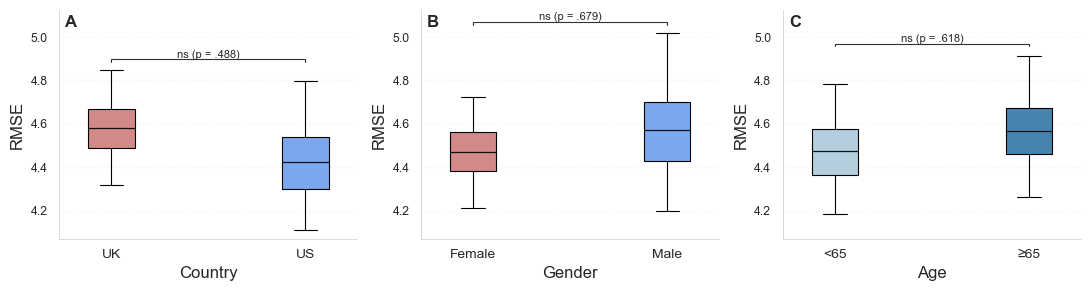

PhonemicFluencyScore {'metrics_by_subgroup_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PhonemicFluencyScore/bias_metrics_by_subgroup_PhonemicFluencyScore.csv', 'pairwise_tests_R2_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PhonemicFluencyScore/bias_pairwise_tests_R2_PhonemicFluencyScore.csv', 'pairwise_tests_MAE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PhonemicFluencyScore/bias_pairwise_tests_MAE_PhonemicFluencyScore.csv', 'pairwise_tests_RMSE_csv': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PhonemicFluencyScore/bias_pairwise_tests_RMSE_PhonemicFluencyScore.csv', 'panels_R2_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/regression/bias/PhonemicFluencyScore/bias_panels_R2_PhonemicFluencyScore.png', 'panels_MAE_png': '/Users/gilanorup/Desktop/Studium/MSc/MA/code/

In [1]:
# setup
import os, sys
import pandas as pd

# add project root
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY
from regression.bias_analyses import run_bias_for_score

oof_dir  = os.path.join(GIT_DIRECTORY, "results", "regression", "oof_results")
oof_path = os.path.join(oof_dir, "oof_preds_all_scores.csv")
oof_all  = pd.read_csv(oof_path)

scores = ["PictureNamingScore","SemanticFluencyScore", "PhonemicFluencyScore"]
output = os.path.join(GIT_DIRECTORY, "results", "regression", "bias")

for target in scores:
    paths = run_bias_for_score(
        oof_preds=oof_all,
        outdir=os.path.join(output, target),
        target=target,
        task="picnicScene",
        model="full",
        n_boot=1000,
        ci=0.95,
        random_state=42
    )

    print(target, paths)
